In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [12]:
# Importar bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [13]:
# Leitura do nosso arquivo csv, separada com ponto e virgula
df = pd.read_csv("catalogo_filmes.csv", sep=';')  


In [14]:
df.head(15)

,Filmes,Ano,Categoria,Pontos,Nacionalidade
0,Meu Namorado É Um Zumbi,2013,Comédia,10,Estrangeiro
1,Luzes Da Ribalta,1952,Drama,13,Estrangeiro
2,Arranha-Céu: Coragem Sem Limite,2018,Aventura,17,Estrangeiro
3,"Boa Sorte, Leo Grande",2022,Comédia,8,Estrangeiro
4,Desapega,2021,Comédia,47,Estrangeiro
5,A Máscara de Ferro,2019,Ação,96,Estrangeiro
6,Medusa,2022,Terror,51,Estrangeiro
7,Até O Limite,2022,Suspense,23,Estrangeiro
8,Operação Hunt,2022,Ação,32,Estrangeiro
9,A Princesa Prometida,1987,Aventura,14,Estrangeiro


In [15]:
# Quantidades de linhas e colunas
df.shape


(165, 5)

In [16]:
# Contar dados nulos em cada coluna
nulos_por_coluna = df.isnull().sum()
print(nulos_por_coluna)

Filmes           0
Ano              0
Categoria        0
Pontos           0
Nacionalidade    0
dtype: int64


In [17]:
# Contar dados nulos por linhas
nulos_por_linhas = df.isnull().sum(axis=1)
print(nulos_por_linhas)

0      0
1      0
2      0
3      0
4      0
      ..
160    0
161    0
162    0
163    0
164    0
Length: 165, dtype: int64


In [18]:
# Descrição de dados
df.describe()

,Ano,Pontos
count,165.000000,165.000000
mean,2011.575758,65.575758
std,19.972894,63.550647
min,1923.000000,3.000000
25%,2013.000000,27.000000
50%,2020.000000,51.000000
75%,2022.000000,87.000000
max,2024.000000,450.000000


In [19]:
# Verificar informações  
info_df =df.info()
print(info_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Filmes         165 non-null    object
 1   Ano            165 non-null    int64 
 2   Categoria      165 non-null    object
 3   Pontos         165 non-null    int64 
 4   Nacionalidade  165 non-null    object
dtypes: int64(2), object(3)
memory usage: 6.6+ KB
None


In [20]:
df.columns

Index(['Filmes ', 'Ano ', 'Categoria', 'Pontos', 'Nacionalidade'], dtype='object')

In [21]:
# Renomear as colunas
df.rename(columns={
    'Filmes ': 'Titulos de Filmes', 
    'Ano ': 'Ano de Estreia',
    'Categoria':'Genero', 
    'Pontos': 'Audiencia', 
    'Nacionalidade': 'Origem'
}, inplace=True)

In [22]:
# Salve no csv
df.to_csv('catalogo_tratado.csv', index=False)

In [23]:
# Verificando se os nomes foram alterados corretamente
df.columns

Index(['Titulos de Filmes', 'Ano de Estreia', 'Genero', 'Audiencia', 'Origem'], dtype='object')

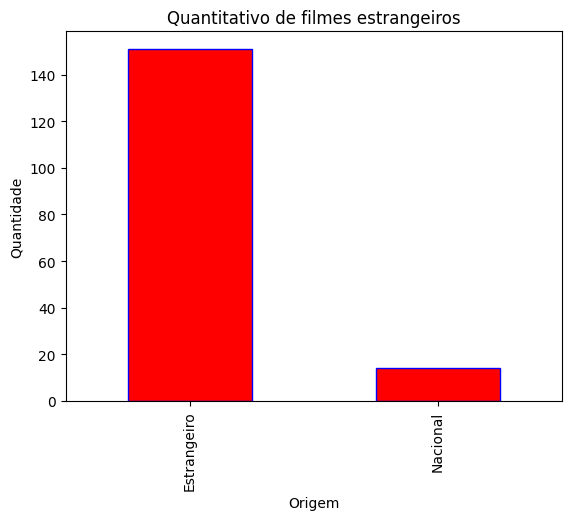

In [24]:
# Quantos filmes estrangeiros existem no catalogo
contagem_estrangeiros = df["Origem"].value_counts()
# Grafico
contagem_estrangeiros.plot (kind="bar", edgecolor="blue", color="red")
plt.xlabel("Origem")
plt.ylabel("Quantidade")
plt.title("Quantitativo de filmes estrangeiros")
plt.show()


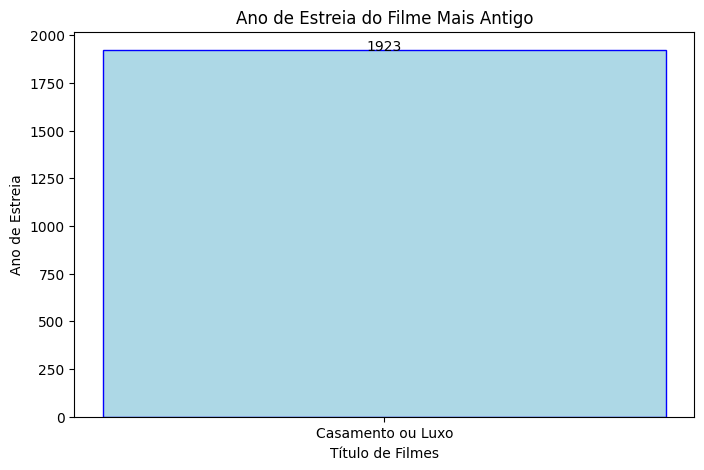

In [28]:
# Qual o filme mais antigo do catalogo?
# Localizando o filme mais antigo
filme_mais_antigo = df.loc[df['Ano de Estreia'].idxmin()]

# Buscando informações do filme mais antigo
titulo = filme_mais_antigo['Titulos de Filmes']  
ano = filme_mais_antigo['Ano de Estreia']  

plt.figure(figsize=(8, 5))
plt.bar(titulo, ano, color='lightblue', edgecolor='blue')

# Adicionando os rótulos
plt.xlabel("Título de Filmes")
plt.ylabel("Ano de Estreia")
plt.title("Ano de Estreia do Filme Mais Antigo")

# Adicionando o texto com o ano acima da barra
plt.text(titulo, ano + 0.1, str(ano), ha='center', color='black')

plt.show()


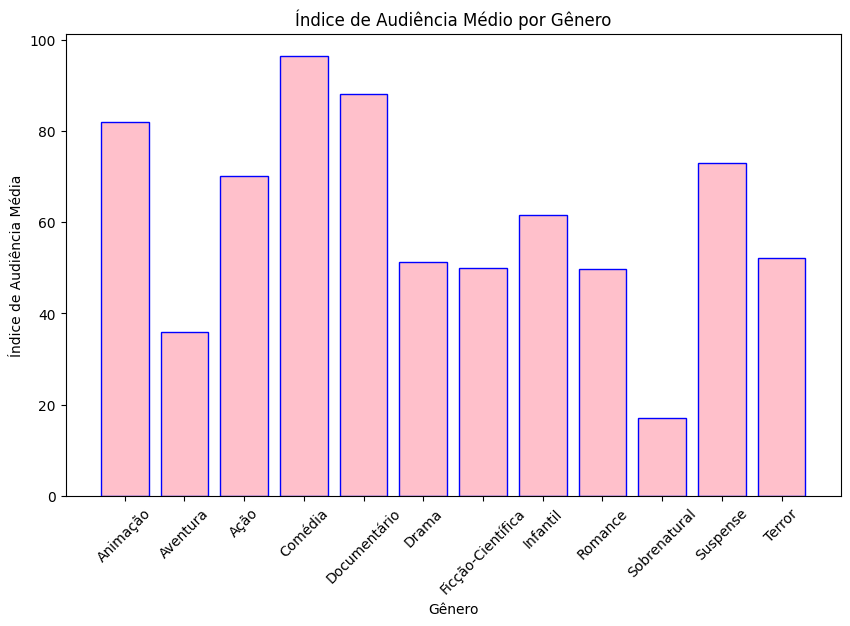

In [29]:
# Remover espaços dos nomes das colunas
df.columns = df.columns.str.strip()
# Calcular a média do índice de audiência por gênero
media_audiencia_por_genero = df.groupby('Genero')['Audiencia'].mean().reset_index()

# Plotagem
plt.figure(figsize=(10, 6))
plt.bar(media_audiencia_por_genero['Genero'], media_audiencia_por_genero['Audiencia'], color='pink', edgecolor='blue')
plt.xlabel("Gênero")
plt.ylabel("Índice de Audiência Média")
plt.title("Índice de Audiência Médio por Gênero")
plt.xticks(rotation=45)  
plt.show()

Teste T de Índice de Audiência
Estatística T: 0.956
Valor P: 0.345


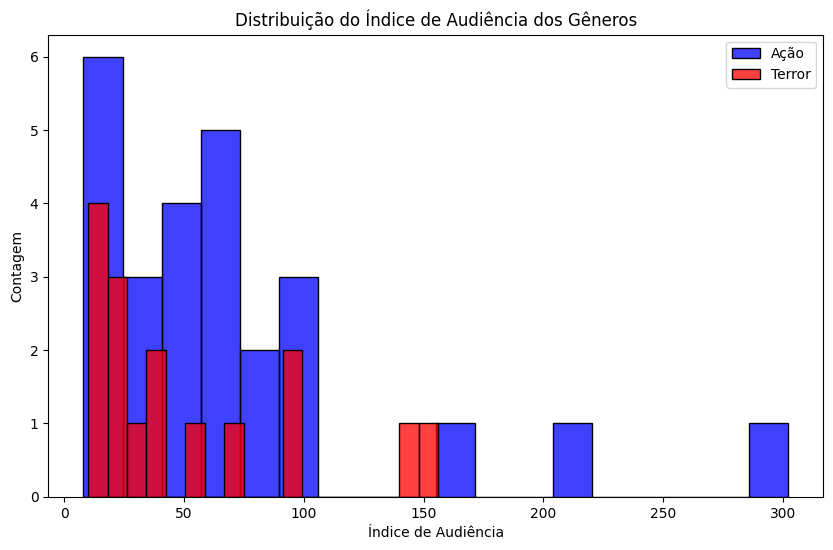

Não rejeitamos a hipótese nula: Não há diferença significativa entre os índices de audiência.


In [30]:
# Amostras
audiencia_acao = df[df['Genero'] == 'Ação']['Audiencia'].dropna()
audiencia_terror = df[df['Genero'] == 'Terror']['Audiencia'].dropna()

# Teste t 
estatistica_t, valor_p = ttest_ind(audiencia_acao, audiencia_terror)

print("Teste T de Índice de Audiência")
print(f"Estatística T: {estatistica_t:.3f}")
print(f"Valor P: {valor_p:.3f}")

# Gráfico
plt.figure(figsize=(10, 6))
sns.histplot(audiencia_acao, color='blue', label='Ação', bins=18)
sns.histplot(audiencia_terror, color='red', label='Terror', bins=18)


# Rótulo
plt.legend()
plt.title("Distribuição do Índice de Audiência dos Gêneros")
plt.xlabel("Índice de Audiência")
plt.ylabel("Contagem")
plt.show()

# Interpretação
if valor_p < 0.05:
    print("Rejeitamos a hipótese nula: Há uma diferença significativa entre os índices de audiência.")
else:
    print("Não rejeitamos a hipótese nula: Não há diferença significativa entre os índices de audiência.")